In [1]:
%run ../Python_files/util_data_storage_and_load.py

In [2]:
%run ../Python_files/util.py

No dicts found; please check load_dicts...


In [3]:
list_of_lists = []

with open('../temp_files/OD_demand_matrix_Apr_weekday_PM_journal.txt', 'r') as the_file:
    idx = 0
    for line in the_file:
        inner_list = [elt.strip() for elt in line.split(',')]
        list_of_lists.append(inner_list)

In [4]:
assert len(list_of_lists) == 74 * (74 - 1)

In [5]:
sum([float(list_of_lists[i][2]) for i in range(len(list_of_lists))])

65576.37543099989

In [6]:
zero_value = 0.0
with open("../data_tntp/journal_trips_Apr_PM.tntp", "w") as text_file:
    text_file.write("<NUMBER OF ZONES> 74\n")
    text_file.write("<TOTAL OD FLOW> 65576.37543099989\n")
    text_file.write("<END OF METADATA>\n\n\n")
    
    for n in range(74):
        text_file.write("Origin  %d  \n" %(n+1))
        text_file.write("%d :      0.0;    " %(n+1))
        for idx in range(n*73, (n+1)*73):
            text_file.write("%d :      %f;    " \
                            %(int(list_of_lists[idx][1]), float(list_of_lists[idx][2])))
            if idx % 3 == 0:
                text_file.write("\n")
        text_file.write("\n\n")

In [7]:
max([float(list_of_lists[i][2]) for i in range(len(list_of_lists))])

957.700233

In [8]:
min([float(list_of_lists[i][2]) for i in range(len(list_of_lists))])

0.0

Number of OD pairs with demand greater than 100: 
173


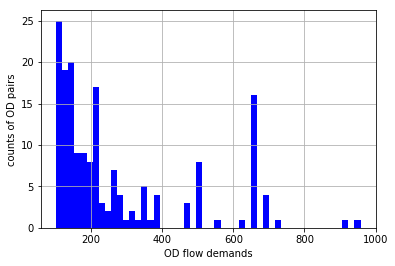

In [9]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# OD demands
x = [float(list_of_lists[i][2]) for i in range(len(list_of_lists))]
x = [item for item in x if item > 100]
print("Number of OD pairs with demand greater than 100: ")
print len(x)

# the histogram of the data
plt.hist(x, 50, facecolor='blue')

plt.xlabel('OD flow demands')
plt.ylabel('counts of OD pairs')
# plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()